# My Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

!pip install modelbit
import modelbit

mb =modelbit.login()

import warnings
warnings.simplefilter("ignore")

sns.set_style('darkgrid')
sns.set_palette('crest_r')
import re

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,StandardScaler,FunctionTransformer,PowerTransformer,MinMaxScaler,PolynomialFeatures


from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold,cross_val_score




from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error
import  sklearn
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,SGDRegressor,ElasticNet,Ridge,Lasso
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor

from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgbm

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import RobustScaler


#feature engineering
from sklearn.feature_selection import mutual_info_regression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer



### Columns Description :

.

* **id**: Unique identifier for each gemstone entry.
* **carat**: Weight of the gemstone in carats.
* **cut**: Quality of the gemstone's cut (e.g., Premium, Very Good, Ideal).
* **color**: Color grade of the gemstone (e.g., D, F, G), indicating its level of  colorlessness.

 D: The highest grade, completely colorless and very rare.

 F: Also considered colorless, with very slight traces of color that are hard to see.

 G: Slight tint of color, usually yellow or brown, but still good quality and more affordable than higher grades.


* **clarity**: Clarity grade of the gemstone (e.g., VS2, SI2, VS1), indicating the  presence of flaws or inclusions.

  VS1 (Very Slightly Included 1):
  Tiny flaws, hard to see even under a microscope.
  Still looks nearly perfect, highly wanted.

  VS2 (Very Slightly Included 2):
  Flaws slightly easier to spot than VS1.
  Still looks very clean, great value.

  SI2 (Slightly Included 2):
  Flaws are visible to the naked eye.
  Still a decent choice, especially if budget is a concern

* **depth**: Percentage of the gemstone's depth relative to its diameter.
* **table**: Percentage of the gemstone's table width relative to its diameter.
* **x, y, z**: Dimensions of the gemstone in millimeters (length, width, depth).
* **price**: Price of the gemstone.








In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv("/content/Gemstone.csv")

data.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0,14868,14868,0.50,Ideal,D,SI1,62.1,57.0,5.05,5.08,3.14,1355
1,1,1,165613,165613,2.00,Very Good,G,SI2,59.5,57.0,8.08,8.15,4.89,14691
2,2,2,96727,96727,0.27,Premium,E,VVS1,60.5,59.0,4.19,4.16,2.52,844
3,3,3,145593,145593,0.32,Premium,I,VVS1,61.2,59.0,4.43,4.44,2.71,707
4,4,4,118689,118689,1.19,Ideal,H,SI1,62.5,56.0,6.77,6.81,4.23,5797


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.2  50000 non-null  int64  
 1   Unnamed: 0.1  50000 non-null  int64  
 2   Unnamed: 0    50000 non-null  int64  
 3   id            50000 non-null  int64  
 4   carat         50000 non-null  float64
 5   cut           50000 non-null  object 
 6   color         49677 non-null  object 
 7   clarity       50000 non-null  object 
 8   depth         50000 non-null  float64
 9   table         49731 non-null  float64
 10  x             50000 non-null  float64
 11  y             50000 non-null  float64
 12  z             50000 non-null  float64
 13  price         50000 non-null  int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 5.3+ MB


In [ ]:
data.isna().sum()

Unnamed: 0.2      0
Unnamed: 0.1      0
Unnamed: 0        0
id                0
carat             0
cut               0
color           323
clarity           0
depth             0
table           269
x                 0
y                 0
z                 0
price             0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.dtypes



Unnamed: 0.2      int64
Unnamed: 0.1      int64
Unnamed: 0        int64
id                int64
carat           float64
cut              object
color            object
clarity          object
depth           float64
table           float64
x               float64
y               float64
z               float64
price             int64
dtype: object

There're no duplicates but there are missing values we will deal with them later

I will drop the unnecessary coloumn first to make visualizations more easier

In [ ]:
data.drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'id'],axis=1,inplace=True)

In [ ]:
data2=data.copy()

In [ ]:
data2.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [ ]:
cat_cols=data2.columns[data2.dtypes=='object']
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [ ]:
num_cols=data2.columns[data2.dtypes!='object']
num_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [ ]:
data2[num_cols].describe()

,carat,depth,table,x,y,z,price
count,50000.000000,50000.000000,49731.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.788867,61.817838,57.223032,5.711960,5.716772,3.531765,3957.633100
std,0.460844,1.083336,1.915450,1.105887,1.098892,0.683769,4026.924959
min,0.200000,52.200000,52.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.710000,4.710000,2.910000,956.000000
50%,0.700000,61.900000,57.000000,5.700000,5.710000,3.530000,2387.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5407.000000
max,3.040000,69.900000,79.000000,9.510000,9.460000,5.650000,18818.000000


In [ ]:
cat_cols,num_cols

(Index(['cut', 'color', 'clarity'], dtype='object'),
 Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object'))

In [ ]:
data2[cat_cols].describe()

,cut,color,clarity
count,50000,49677,50000
unique,5,7,8
top,Ideal,G,SI1
freq,23983,11500,13759


In [ ]:
data['cut'].value_counts()

cut
Ideal        23983
Premium      12787
Very Good     9745
Good          2976
Fair           509
Name: count, dtype: int64

In [ ]:
for col in cat_cols:
    print(f"Value counts for column '{col}':")
    print(data2[col].value_counts())
    print()

Value counts for column 'cut':
cut
Ideal        23983
Premium      12787
Very Good     9745
Good          2976
Fair           509
Name: count, dtype: int64

Value counts for column 'color':
color
G    11500
E     9182
F     8732
H     7832
D     6386
I     4424
J     1621
Name: count, dtype: int64

Value counts for column 'clarity':
clarity
SI1     13759
VS2     12327
VS1      8018
SI2      7845
VVS2     4056
VVS1     2758
IF       1109
I1        128
Name: count, dtype: int64



There are zero values in x,y,z which is abnormal

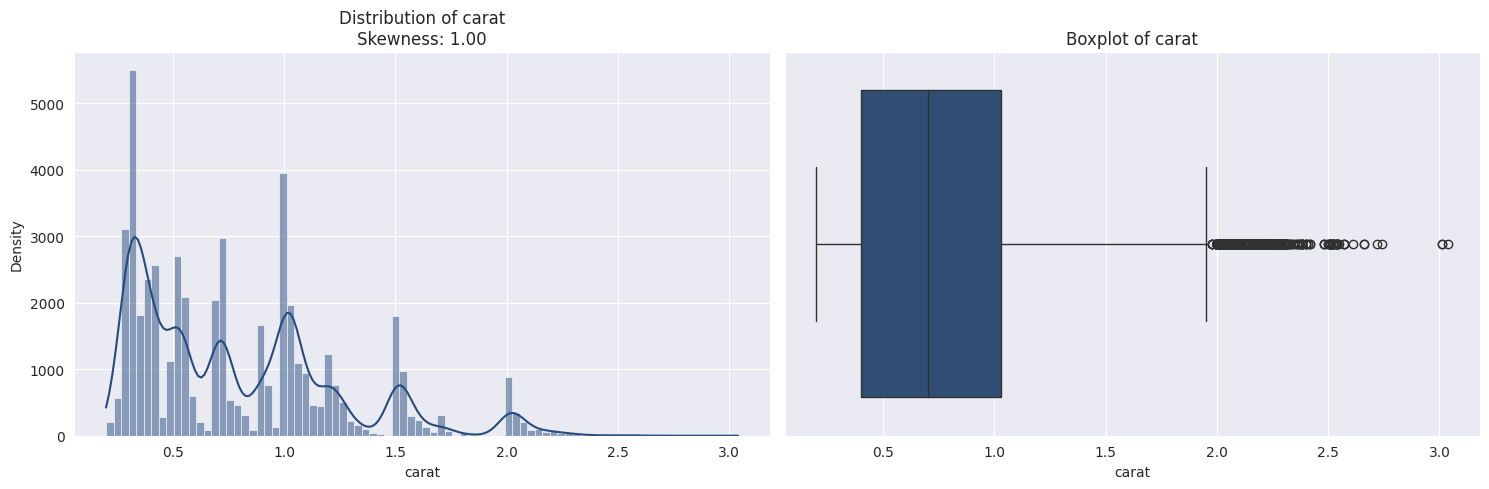

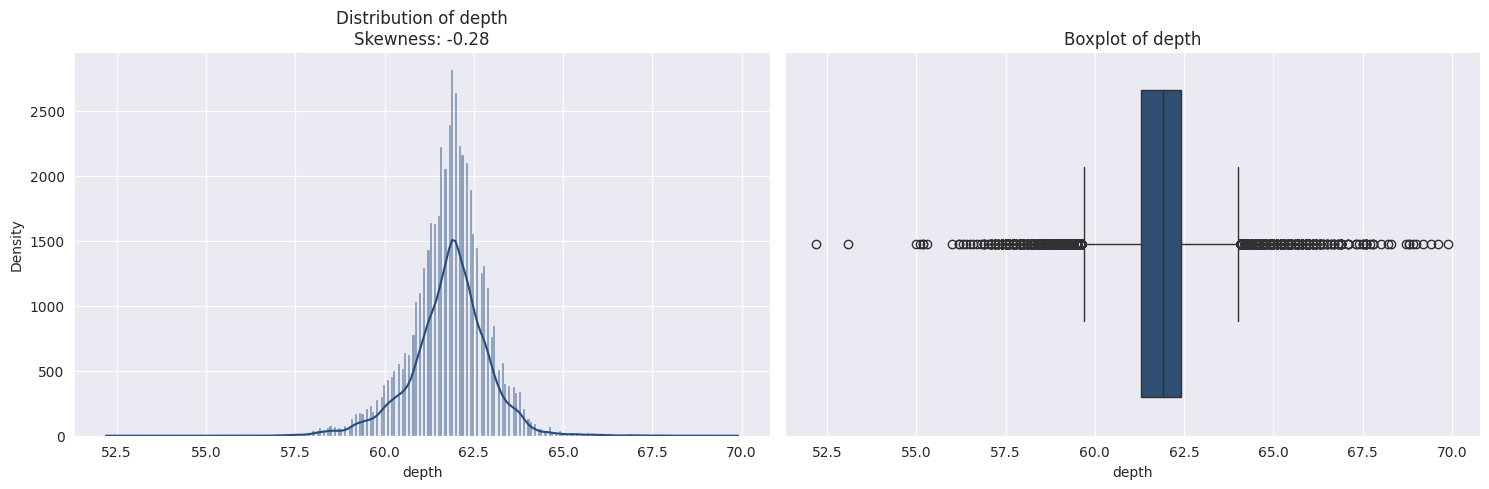

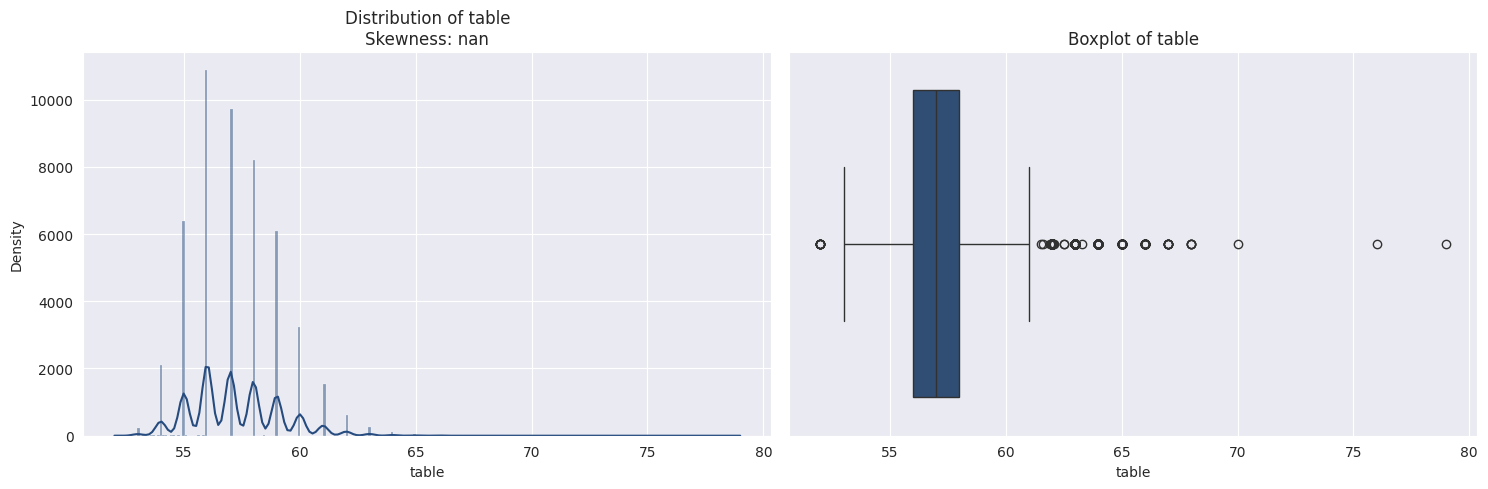

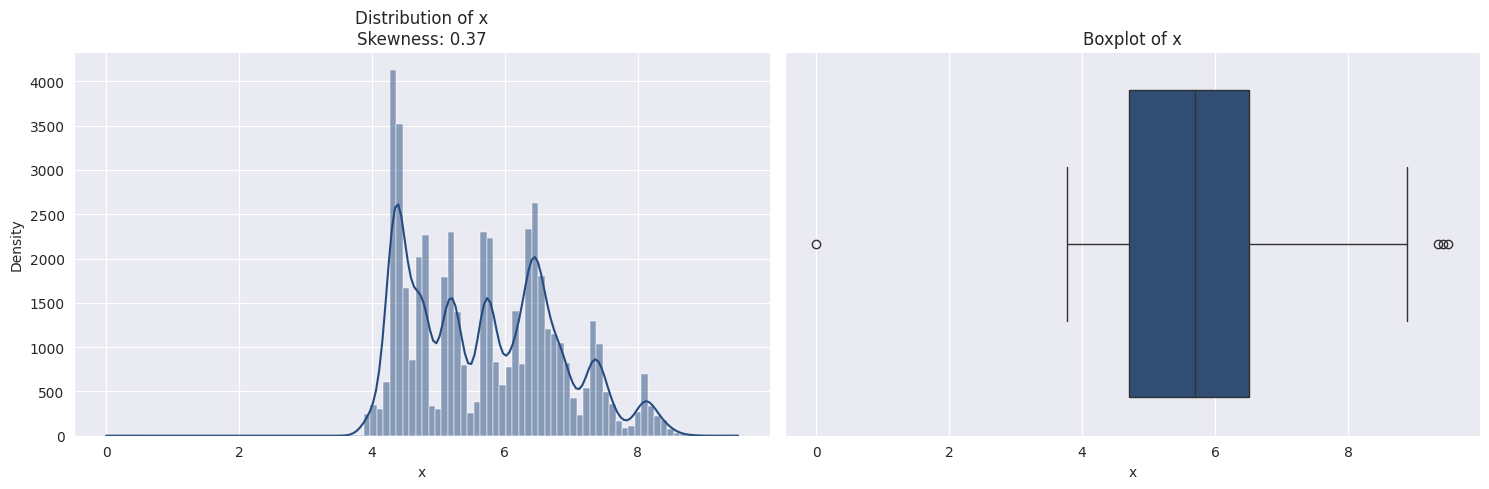

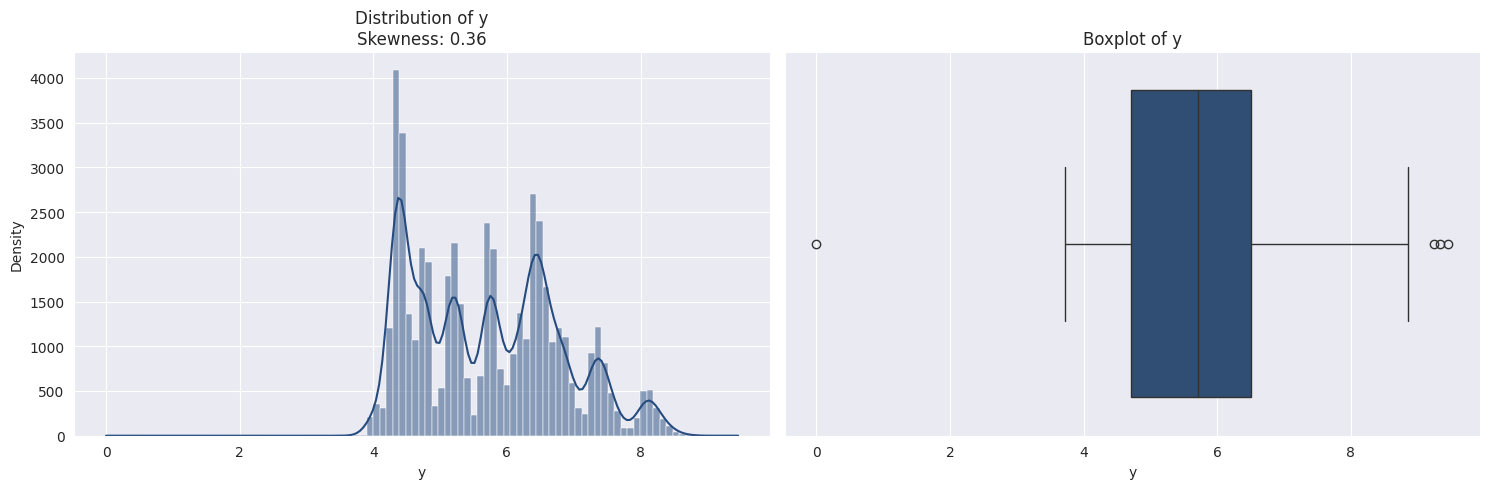

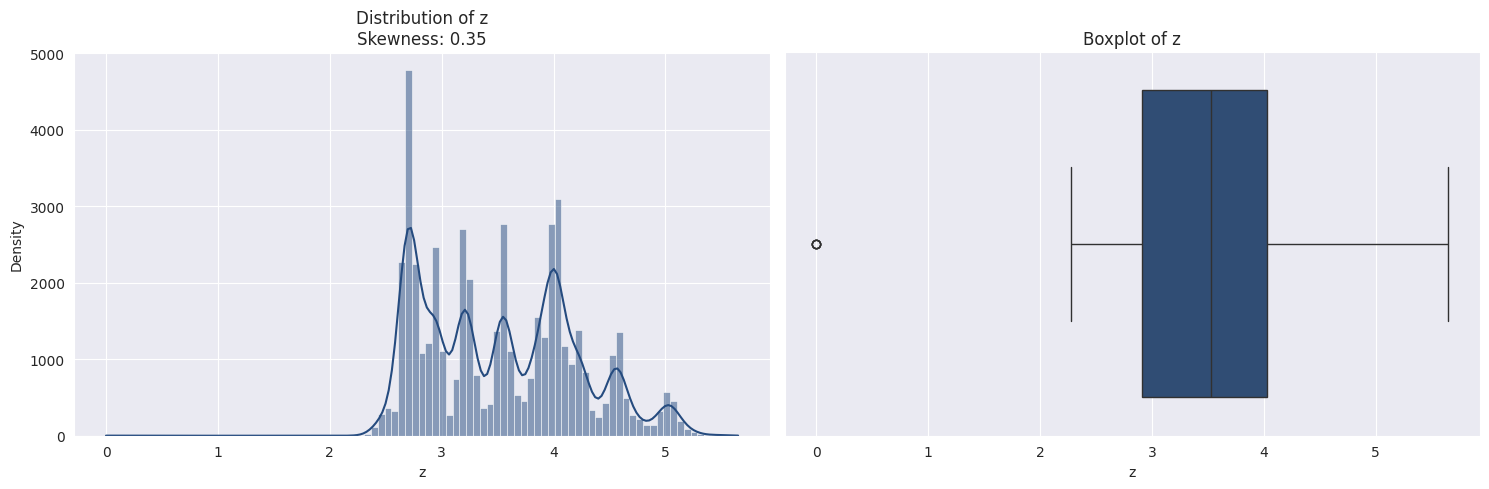

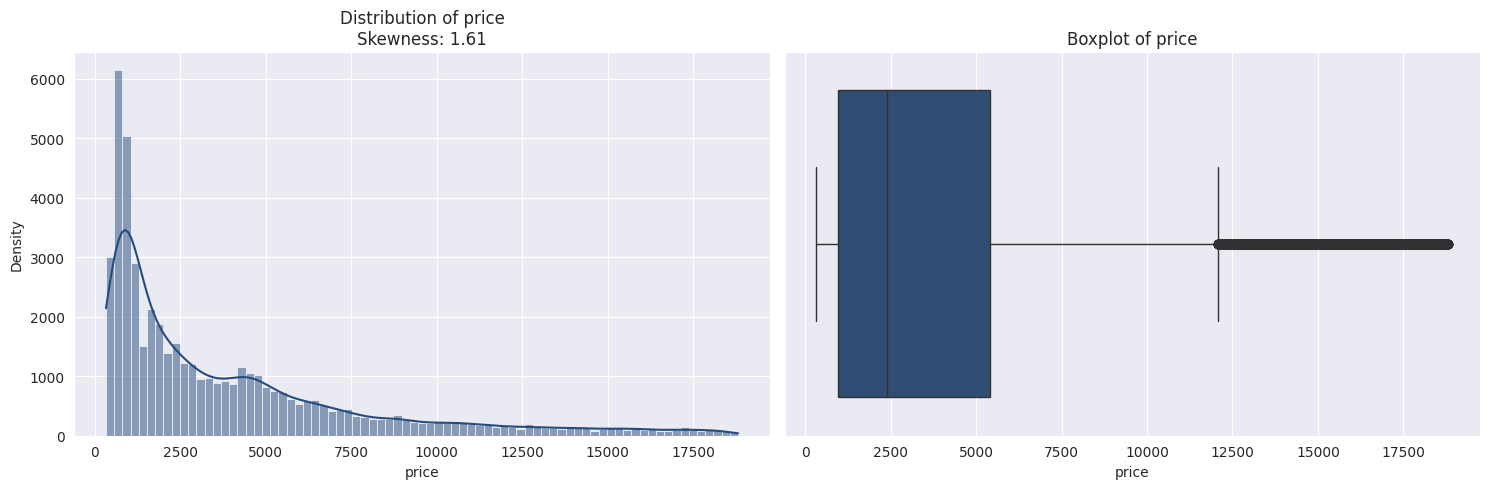

In [ ]:

import scipy.stats as stats

def visualize_data(data, column):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Skewness visualization
    skewness = stats.skew(data[column])
    sns.histplot(data[column], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {column}\nSkewness: {skewness:.2f}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Density')

    # Boxblot visualization
    sns.boxplot(x=data[column], ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')
    axes[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()

for column in data2[num_cols]:
    visualize_data(data2, column)


* carat: The distribution is moderately skewed towards higher carat weights.
* depth: The distribution is slightly skewed towards shallower depths.
* table: The distribution is moderately skewed towards larger table sizes.
* x, y, z: The distributions are moderately skewed towards larger dimensions.
* price: The distribution is significantly skewed towards higher prices

In [ ]:
def detect_outliers(data, threshold=1.5):
    outliers = []
    for column in data2.columns:
        if data2[column].dtype != 'object':
            q1 = data2[column].quantile(0.25)
            q3 = data2[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            column_outliers = data2[(data2[column] < lower_bound) | (data2[column] > upper_bound)]
            if not column_outliers.empty:
                outliers.append(column)
    return outliers

outlier_columns = detect_outliers(data2)
print("Columns with outliers:", outlier_columns)


Columns with outliers: ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']


In [ ]:
data2[num_cols].skew()

carat    0.995341
depth   -0.284514
table    0.653389
x        0.366242
y        0.361033
z        0.348587
price    1.611355
dtype: float64

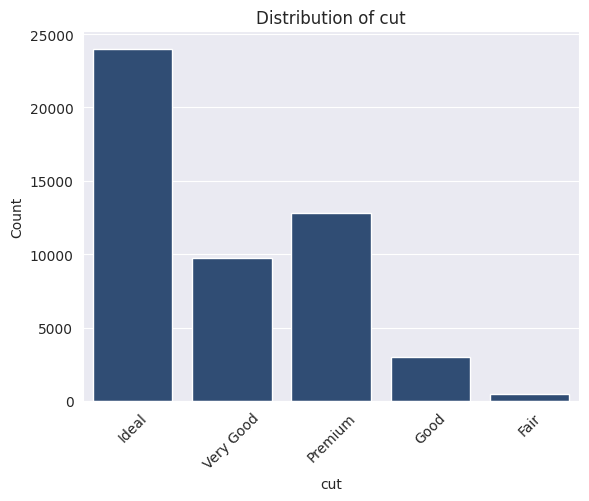

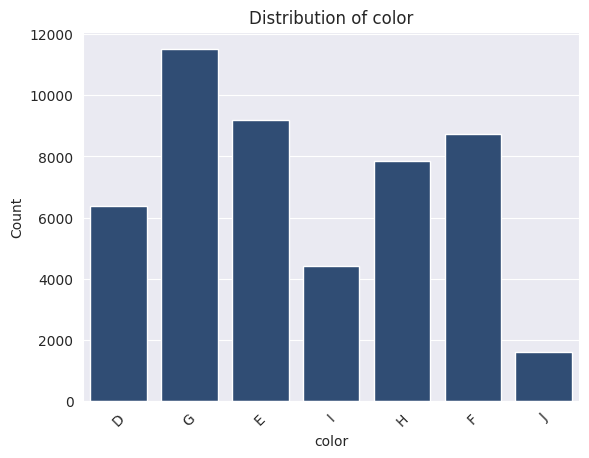

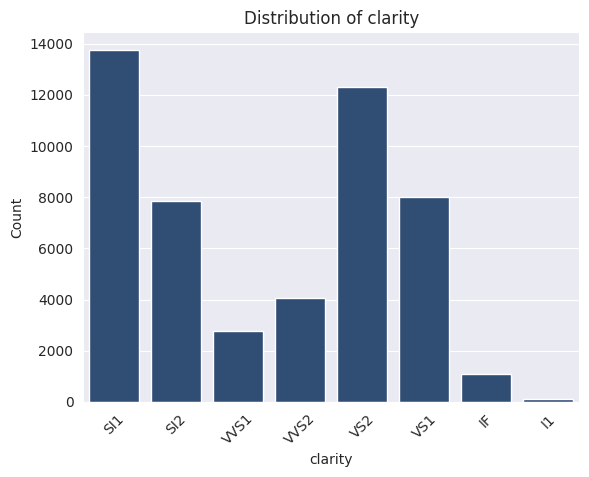

In [ ]:
def visualize_categorical_distribution(data, column):
    sns.countplot(data=data2, x=column)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    plt.show()


for column in data2[cat_cols]:
    visualize_categorical_distribution(data2, column)

* Cut:"Ideal" is the most common cut, followed by "Premium", "Very Good", "Good", and "Fair" in descending order of frequency.
* Color:"G" is the most common color grade, followed by "E", "F", "H", "D", "I", and "J" in descending order of frequency.
* Clarity:"SI1" is the most common clarity grade, followed by "VS2", "VS1", "SI2", "VVS2", "VVS1", "IF", and "I1" in descending order of frequency.

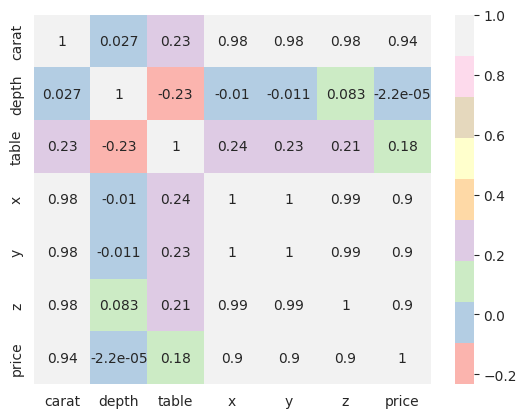

In [ ]:
sns.heatmap(data2[num_cols].corr(), annot = True,cmap="Pastel1")
plt.show()

* Carat and Price: There's a strong positive correlation between carat weight and price. Generally, heavier diamonds cost more.
* Dimensions (x, y, z) and Carat/Price: Larger dimensions (length, width, depth) correspond to higher carat weights and prices.
*Depth and Table: These features have weak correlations, suggesting a slight relationship between the depth and table size of diamonds.
* Table and Carat/Price: Table size shows a moderate positive correlation with carat weight and a weak positive correlation with price

In [ ]:
data2.dropna(inplace=True)
y= data2['price']

mutual_df = data2[num_cols]

mutual_info = mutual_info_regression(mutual_df, y, random_state=1)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df.columns
pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["MI_score"] )

,MI_score
price,8.297899
carat,1.799459
x,1.633708
y,1.625939
z,1.583565
table,0.096669
depth,0.039309


In [ ]:
mutual_df_categorical = data2[cat_cols]
#categorical features must be encoded to get mutual information
for col in mutual_df_categorical:
    mutual_df_categorical[col], _ = mutual_df_categorical[col].factorize()
mutual_info = mutual_info_regression(mutual_df_categorical, y, random_state=1)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df_categorical.columns
pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Categorical_MI"] )

,Categorical_MI
clarity,0.291901
color,0.121714
cut,0.052057


In [ ]:
def feature_engineering(data):
    #  volume
    data['volume'] = data['x'] * data['y'] * data['z']

    #  density
    data['density'] = data['carat'] / data['volume']

    # length-to-width ratio
    data['length_to_width_ratio'] = data['x'] / data['y']

    #  depth-to-table ratio
    data['depth_to_table_ratio'] = data['depth'] / data['table']

    return data


In [ ]:
feature_engineering(data2)

,carat,cut,color,clarity,depth,table,x,y,z,price,volume,density,length_to_width_ratio,depth_to_table_ratio
0,0.50,Ideal,D,SI1,62.1,57.0,5.05,5.08,3.14,1355,80.553560,0.006207,0.994094,1.089474
1,2.00,Very Good,G,SI2,59.5,57.0,8.08,8.15,4.89,14691,322.016280,0.006211,0.991411,1.043860
2,0.27,Premium,E,VVS1,60.5,59.0,4.19,4.16,2.52,844,43.924608,0.006147,1.007212,1.025424
3,0.32,Premium,I,VVS1,61.2,59.0,4.43,4.44,2.71,707,53.303532,0.006003,0.997748,1.037288
4,1.19,Ideal,H,SI1,62.5,56.0,6.77,6.81,4.23,5797,195.018651,0.006102,0.994126,1.116071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.90,Good,G,VVS2,64.1,57.0,6.07,6.13,3.90,4418,145.115490,0.006202,0.990212,1.124561
49996,1.01,Very Good,E,VS2,60.5,58.0,6.53,6.50,3.94,7453,167.233300,0.006039,1.004615,1.043103
49997,2.05,Premium,H,SI2,61.3,58.0,8.19,8.24,5.04,16733,340.127424,0.006027,0.993932,1.056897
49998,0.31,Ideal,F,VVS2,62.4,55.0,4.32,4.36,2.71,761,51.043392,0.006073,0.990826,1.134545


  # Conclusion:


1.   There are missing values
2.   There is no duplicates
3.   There are outliers
4.   The numerical columns is not normal distributed
5.   Tere are some useless columns
6.   The columns are in different ranges
7.   Heavier and larger diamonds tend to be more expensive, while depth and table size have less impact on price compared to carat weight and dimensions.

 # Splitting Data

In [ ]:
X = data.drop('price', axis=1)
y = data['price']

In [ ]:

y

0         1355
1        14691
2          844
3          707
4         5797
         ...  
49995     4418
49996     7453
49997    16733
49998      761
49999      403
Name: price, Length: 50000, dtype: int64

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)


In [ ]:
numerical_cols = X.select_dtypes(include=np.number)
numerical_cols.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [ ]:
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(exclude=np.number).columns

 # Numerical Pipelines

In [ ]:

''''
class CustomFeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Perform feature engineering here

        X['volume'] = X['x'] * X['y'] * X['z']
        #X['density'] = X['carat'] / X['volume']



        return X
        '''''

In [ ]:
feature_eng_pipeline = Pipeline([
    ('feature_engineering', CustomFeatureEngineering())
])


In [ ]:
zero_imputer = SimpleImputer(strategy='mean', fill_value=0)
numerical_pipeline1 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('power_transformer',PowerTransformer()),
    ('zero_imputer',zero_imputer),
    #('feature_eng', feature_eng_pipeline, ['x', 'y', 'z', 'carat', 'table', 'depth'])
])

In [ ]:
numerical_pipeline2=Pipeline([

    ('impute', KNNImputer(n_neighbors=6)),
    ('power_transformer',PowerTransformer()),
    ('MinMax',MinMaxScaler()),
    ('zero_imputer',zero_imputer)
    #('feature_eng', feature_eng_pipeline, ['x', 'y', 'z', 'carat', 'table', 'depth'])
        ])

In [ ]:
numerical_pipeline3=Pipeline([

    ('imputer', SimpleImputer(strategy='mean')),

    ('power_transformer',PowerTransformer()),

    ('RobustScalar', RobustScaler())

        ])

 # Categorical Pipelines

In [ ]:
categorical_pipeline1 = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
])

In [ ]:
categorical_pipeline2=Pipeline([

    ('Imputer',SimpleImputer(strategy='most_frequent')),

    ('OrdinalEncoder',OrdinalEncoder())
        ])


 # Full Pipelines

In [ ]:
fullpipeline1= ColumnTransformer([
    ('num', numerical_pipeline1, numerical_cols),
    ('cat', categorical_pipeline1, categorical_cols),
      #('feature_eng', feature_eng_pipeline, ['x', 'y', 'z', 'carat', 'table', 'depth'])
])

In [ ]:
fullpipeline2 = ColumnTransformer([
    ('num', numerical_pipeline2, numerical_cols),
    ('cat', categorical_pipeline2, categorical_cols),
      #('feature_eng', feature_eng_pipeline, ['x', 'y', 'z', 'carat', 'table', 'depth'])
])

In [ ]:
fullpipeline3 = ColumnTransformer([
    ('num', numerical_pipeline1, numerical_cols),
    ('cat', categorical_pipeline2, categorical_cols),
      #('feature_eng', feature_eng_pipeline, ['x', 'y', 'z', 'carat', 'table', 'depth'])
])

In [ ]:
fullpipeline4= ColumnTransformer([
    ('num', numerical_pipeline2, numerical_cols),
    ('cat', categorical_pipeline1, categorical_cols),
      #('feature_eng', feature_eng_pipeline, ['x', 'y', 'z', 'carat', 'table', 'depth'])
])



In [ ]:
fullpipeline5= ColumnTransformer([
    ('num', numerical_pipeline3, numerical_cols),
    ('cat', categorical_pipeline1, categorical_cols),
      #('feature_eng', feature_eng_pipeline, ['x', 'y', 'z', 'carat', 'table', 'depth'])
])

In [ ]:
fullpipeline6= ColumnTransformer([
    ('num', numerical_pipeline3, numerical_cols),
    ('cat', categorical_pipeline2, categorical_cols),
      #('feature_eng', feature_eng_pipeline, ['x', 'y', 'z', 'carat', 'table', 'depth'])
])

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor

# Define a list of pipelines and models
pipelines = [(fullpipeline1, "fullpipeline1"), (fullpipeline2, "fullpipeline2"),
             (fullpipeline3, "fullpipeline3"), (fullpipeline4, "fullpipeline4"),
             (fullpipeline5, "fullpipeline5"),(fullpipeline6, "fullpipeline6")]
models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100, random_state=48),
    GradientBoostingRegressor(n_estimators=100, random_state=48),
    XGBRegressor(n_estimators=100, random_state=48),
    LGBMRegressor(n_estimators=100, random_state=48)
]

# Initialize an empty list to store the results
results = []

# Iterate over each pipeline and model combination
for pipeline, pipeline_name in pipelines:
    for model in models:
        # Create a pipeline with the current preprocessor and model
        model_pipeline = Pipeline([
            ('preprocessor', pipeline),
            ('regressor', model)
        ])

        # Fit the model pipeline on the training data
        model_pipeline.fit(X_train, y_train)

        # Evaluate the model on the validation set
        val_rmse = np.sqrt(mean_squared_error(y_val, model_pipeline.predict(X_val)))

        # Evaluate the model on the test set
        train_rmse = np.sqrt(mean_squared_error(y_train, model_pipeline.predict(X_train)))


        # Append the results to the list
        results.append({
            'Model': type(model).__name__,
            'Pipeline': pipeline_name,
            'Train RMSE': train_rmse,
            'Validation RMSE': val_rmse,

        })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Sort the DataFrame by validation RMSE in ascending order
results_df = results_df.sort_values(by='Validation RMSE')

# Print the DataFrame
results_df.head(5)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1165
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 26
[LightGBM] [Info] Start training from score 3974.349257
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1161
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 9
[LightGBM] [Info] Start training from score 3974.349257
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Tot

,Model,Pipeline,Train RMSE,Validation RMSE
19,LGBMRegressor,fullpipeline4,525.347290,613.389326
4,LGBMRegressor,fullpipeline1,527.063804,614.930316
24,LGBMRegressor,fullpipeline5,526.576896,616.989511
29,LGBMRegressor,fullpipeline6,526.560060,617.316289
14,LGBMRegressor,fullpipeline3,525.545964,617.986053


In [ ]:
# Find the row with the minimum validation RMSE
best_row = results_df.loc[results_df['Validation RMSE'].idxmin()]

# Print the best model and pipeline
print("\nBest Model:")
print(f"Model: {best_row['Model']}")
print("Pipeline:", best_row['Pipeline'])



Best Model:
Model: LGBMRegressor
Pipeline: fullpipeline4


In [ ]:
lgbm_pipeline = Pipeline([
    ('preprocessor',fullpipeline4),
    ('regressor', LGBMRegressor( max_depth=30, random_state=48,learning_rate=.1))  # best parameters
])
lgbm_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer(n_neighbors=6)),
                                                                  ('power_transformer',
                                                                   PowerTransformer()),
                                                                  ('MinMax',
                                                                   MinMaxScaler()),
                                                                  ('zero_imputer',
                                                                   SimpleImputer(fill_value=0))]),
                                                  Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['cut', 'color', 'clarity'], dtype='object'))])),
                ('regressor', LGBMRegressor(max_depth=30, random_state=48))])

In [ ]:

# Fit the model pipeline on the training data
lgbm_pipeline.fit(X_train, y_train)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1181
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 26
[LightGBM] [Info] Start training from score 3974.349257


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer(n_neighbors=6)),
                                                                  ('power_transformer',
                                                                   PowerTransformer()),
                                                                  ('MinMax',
                                                                   MinMaxScaler()),
                                                                  ('zero_imputer',
                                                                   SimpleImputer(fill_value=0))]),
                                                  Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['cut', 'color', 'clarity'], dtype='object'))])),
                ('regressor', LGBMRegressor(max_depth=30, random_state=48))])

In [ ]:

# Evaluate the model on the training, validation, and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, lgbm_pipeline.predict(X_train)))
val_rmse = np.sqrt(mean_squared_error(y_val, lgbm_pipeline.predict(X_val)))
test_rmse = np.sqrt(mean_squared_error(y_test, lgbm_pipeline.predict(X_test)))

print(f"Train RMSE: {train_rmse}")
print(f"Validation RMSE: {val_rmse}")
print(f"Test RMSE: {test_rmse}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Train RMSE: 525.3472897110174
Validation RMSE: 613.3893260136814
Test RMSE: 598.3716466834529


#Hypertunining

In [ ]:

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'regressor__n_estimators': [20, 50, 100],
    'regressor__max_depth': [10, 20, 30, 7],
    'regressor__learning_rate': [0.1, 0.2, 0.3]
}


grid_search = GridSearchCV(lgbm_pipeline, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the training, validation, and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, best_model.predict(X_train)))
val_rmse = np.sqrt(mean_squared_error(y_val, best_model.predict(X_val)))
test_rmse = np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))



[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1160
[LightGBM] [Info] Number of data points in the train set: 28000, number of used features: 26
[LightGBM] [Info] Start training from score 3984.292286
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[Ligh

In [ ]:
'''print(f"Train RMSE: {train_rmse}")
print(f"Validation RMSE: {val_rmse}")
print(f"Test RMSE: {test_rmse}")'''


Train RMSE: 525.3472897110174
Validation RMSE: 613.3893260136814
Test RMSE: 598.3716466834529


In [ ]:

'''print(grid_search.best_estimator_)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer(n_neighbors=6)),
                                                                  ('power_transformer',
                                                                   PowerTransformer()),
                                                                  ('MinMax',
                                                                   MinMaxScaler()),
                                                                  ('zero_imputer',
                                                                   SimpleImputer(fill_value=0))]),
                                                  Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')),
                                                 ('cat',
                                            

  # Preparing for Deployment

In [ ]:
import joblib

In [ ]:
joblib.dump(lgbm_pipeline, 'gemstone.pkl')

['gemstone.pkl']

In [ ]:

try:
    with open('/content/gemstone_price_prediction_model.pkl','rb') as f:
        GBR_pipeline=joblib.load(f)
except Exception as err:
    print(f"Unexpected {err=},{type(err)=}")

new_data=pd.DataFrame({
    'carat': [0.50, 0.8, 1.2],
    'cut': ['Ideal', 'Premium', 'Good'],
    'color': ['D', 'E', 'F'],
    'clarity': ['SI1', 'VS2', 'SI1'],
    'depth': [62.1, 62.3, 59.8],
    'table': [57, 58, 62],
    'x': [5.05, 6.05, 6.75],
    'y': [5.08, 6.08, 6.80],
    'z': [3.14, 3.76, 4.05]
})

new_data_transformed=GBR_pipeline.named_steps['preprocessor'].transform(new_data)
predictions=GBR_pipeline.named_steps['regressor'].predict(new_data_transformed)
print(f'Predicted values: {predictions}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Predicted values: [1454.28119217 3727.95537262 6156.34905684]


In [ ]:
import modelbit
mb =modelbit.login()

In [ ]:
def predictedd(carat : float, cut : str, color : str, clarity : str, depth : float, table : float, x : float, y : float, z : float):
    # Load the model
    fullpipeline4= ColumnTransformer([
        ('num', numerical_pipeline2, numerical_cols),
        ('cat', categorical_pipeline1, categorical_cols),
        #('feature_eng', feature_eng_pipeline, ['x', 'y', 'z', 'carat', 'table', 'depth'])
    ])
    # Create a DataFrame with the new data
    new_data = pd.DataFrame({
        'carat': [carat],
        'cut': [cut],
        'color': [color],
        'clarity': [clarity],
        'depth': [depth],
        'table': [table],
        'x': [x],
        'y': [y],
        'z': [z]
    })
    # predict new_data
    new_data_transformed=lgbm_pipeline.named_steps['preprocessor'].transform(new_data)
    predictions=lgbm_pipeline.named_steps['regressor'].predict(new_data_transformed)
    return predictions

mb.deploy(predictedd)

Uploading 'lgbm_pipeline': 100%|██████████| 426k/426k [00:00<00:00, 477kB/s]


In [ ]:
from flask import Flask, request, render_template, jsonify
import requests

app = Flask(__name__)

@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        carat = float(request.form['carat'])
        cut = request.form['cut']
        color = request.form['color']
        clarity = request.form['clarity']
        depth = float(request.form['depth'])
        table = float(request.form['table'])
        x = float(request.form['x'])
        y = float(request.form['y'])
        z = float(request.form['z'])

        payload = {
            "data": [carat, cut, color, clarity, depth, table, x, y, z]
        }

        response = requests.post("https://mega.us-east-1.modelbit.com/v1/predictedd/latest", json=payload)
        if response.status_code == 200:
            prediction = response.json()['data'][0]
            return render_template('index.html', prediction=prediction)
        else:
            return "Error: Unable to get prediction"

    return render_template('index.html')

if __name__ == '__main__':
    app.run(debug=True)